# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible





5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

In [128]:


# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
# url string that hosts our .csv file
ruta = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(ruta)
dataset1 = pd.read_csv(ruta)
dataset2 = pd.read_csv(ruta)

In [129]:

print(dataset.shape)

dataset.head()

(150, 5)


,Sepallength,Sepalwidth,Petallength,Petalwidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:

dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


In [131]:

dataset = dataset.replace({"Name":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })
dataset1 = dataset.replace({"Name":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })
dataset2 = dataset.replace({"Name":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

dataset

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [132]:

# Encoding the categorical column
dataset = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset1 = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset2 = dataset.replace({"nombre":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

dataset

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [133]:
# Drop out non necesary columns
dataset.drop(['Sepallength', 'Sepalwidth'],axis='columns',inplace=True)

#Visualize the dataset
dataset

,Petallength,Petalwidth,Name
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,3
146,5.0,1.9,3
147,5.2,2.0,3
148,5.4,2.3,3


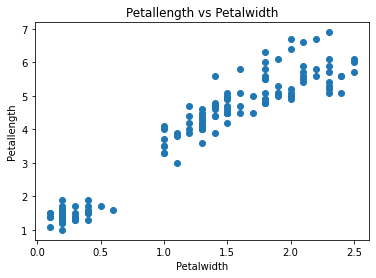

In [134]:
plt.scatter(dataset.Petalwidth,dataset.Petallength)
plt.title('Petallength vs Petalwidth')
plt.xlabel('Petalwidth')
plt.ylabel('Petallength')
plt.show()

<ipython-input-135-8d3758ce79cc>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.Petalwidth, df0.Petallength, Label='Iris-setosa')
<ipython-input-135-8d3758ce79cc>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petalwidth, df1.Petallength, Label='Iris-versicolor')
<ipython-input-135-8d3758ce79cc>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petalwidth, df2.Petallength, Label='Iris-virginica')


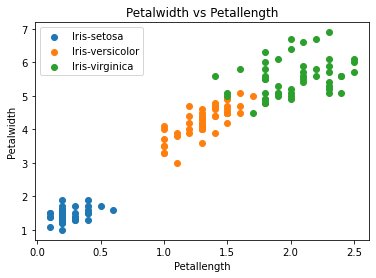

In [135]:
df0 = dataset[dataset.Name==1]
df1 = dataset[dataset.Name==2]
df2 = dataset[dataset.Name==3]

plt.scatter(df0.Petalwidth, df0.Petallength, Label='Iris-setosa')
plt.scatter(df1.Petalwidth, df1.Petallength, Label='Iris-versicolor')
plt.scatter(df2.Petalwidth, df2.Petallength, Label='Iris-virginica')

plt.title('Petalwidth vs Petallength')
plt.xlabel('Petallength')
plt.ylabel('Petalwidth')
plt.legend()

In [136]:

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petalwidth','Petallength']])

# Print estimated cluster of each point in the dataser
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:

# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,Petallength,Petalwidth,Name,Cluster1
0,1.4,0.2,1,2
1,1.4,0.2,1,2
2,1.3,0.2,1,2
3,1.5,0.2,1,2
4,1.4,0.2,1,2
...,...,...,...,...
145,5.2,2.3,3,1
146,5.0,1.9,3,1
147,5.2,2.0,3,1
148,5.4,2.3,3,1


In [138]:
dataset.Cluster1.unique()


array([2, 0, 1])

In [139]:
km.cluster_centers_


array([[1.34230769, 4.26923077],
       [2.0375    , 5.59583333],
       [0.246     , 1.462     ]])

In [140]:
km.inertia_


31.371358974358966

<ipython-input-141-3b1cb44f2dcb>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df0.Petalwidth, df0.Petallength, Label='Iris-setosa')
<ipython-input-141-3b1cb44f2dcb>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petalwidth, df1.Petallength, Label='Iris-versicolor')
<ipython-input-141-3b1cb44f2dcb>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petalwidth, df2.Petallength, Label='Iris-virginica')


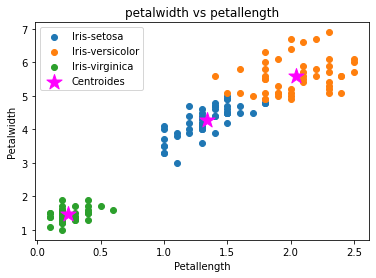

In [141]:
df0 = dataset[dataset.Cluster1==0]
df1 = dataset[dataset.Cluster1==1]
df2 = dataset[dataset.Cluster1==2]

plt.scatter(df0.Petalwidth, df0.Petallength, Label='Iris-setosa')
plt.scatter(df1.Petalwidth, df1.Petallength, Label='Iris-versicolor')
plt.scatter(df2.Petalwidth, df2.Petallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('petalwidth vs petallength')
plt.xlabel('Petallength')
plt.ylabel('Petalwidth')
plt.legend()
plt.show()

In [142]:
#Elbow Petas
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Petallength','Petalwidth']])
    sse.append(km.inertia_)

C:\Users\Hecto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


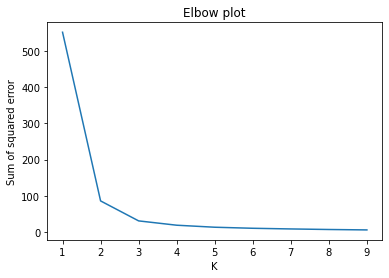

In [143]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [144]:
#

In [145]:
#Punto 2 Inicio
#
#
#

In [146]:
dataset1

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [147]:
dataset1 = dataset1.dropna()
print(dataset1.shape)

(150, 5)


In [148]:
#Do clustering with the iris flower dataset to form clusters using as features 
#sepal width and length. Drop out the other two features (petal width and 
#length) for simplicity.
# Drop out non necesary columns
dataset1.drop(['Petallength', 'Petalwidth'],axis='columns',inplace=True)

#Visualize the dataset
dataset1

,Sepallength,Sepalwidth,Name
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,3
146,6.3,2.5,3
147,6.5,3.0,3
148,6.2,3.4,3


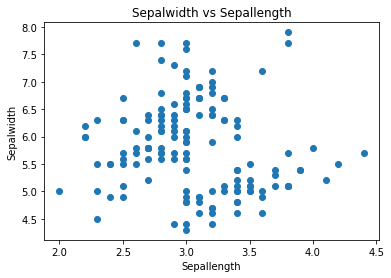

In [149]:

plt.scatter(dataset1.Sepalwidth,dataset1.Sepallength)
plt.title('Sepalwidth vs Sepallength')
plt.xlabel('Sepallength')
plt.ylabel('Sepalwidth')
plt.show()

<ipython-input-150-8b91850583d0>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f0.Sepalwidth, d1f0.Sepallength, Label='Iris-setosa')
<ipython-input-150-8b91850583d0>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f1.Sepalwidth, d1f1.Sepallength, Label='Iris-versicolor')
<ipython-input-150-8b91850583d0>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f2.Sepalwidth, d1f2.Sepallength, Label='Iris-virginica')


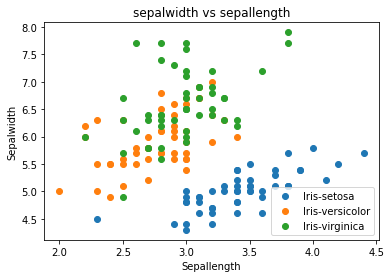

In [150]:
d1f0 = dataset1[dataset1.Name==1]
d1f1 = dataset1[dataset1.Name==2]
d1f2 = dataset1[dataset1.Name==3]

plt.scatter(d1f0.Sepalwidth, d1f0.Sepallength, Label='Iris-setosa')
plt.scatter(d1f1.Sepalwidth, d1f1.Sepallength, Label='Iris-versicolor')
plt.scatter(d1f2.Sepalwidth, d1f2.Sepallength, Label='Iris-virginica')

plt.title('sepalwidth vs sepallength')
plt.xlabel('Sepallength')
plt.ylabel('Sepalwidth')
plt.legend()
plt.show()

In [151]:

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset1[['Sepalwidth','Sepallength']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [152]:
# Add a new column to the dataset with the cluster information
dataset1['Cluster1'] = yp

dataset1

,Sepallength,Sepalwidth,Name,Cluster1
0,5.1,3.5,1,1
1,4.9,3.0,1,1
2,4.7,3.2,1,1
3,4.6,3.1,1,1
4,5.0,3.6,1,1
...,...,...,...,...
145,6.7,3.0,3,2
146,6.3,2.5,3,0
147,6.5,3.0,3,2
148,6.2,3.4,3,2


In [153]:
dataset1.Cluster1.unique()


array([1, 2, 0])

In [154]:
km.cluster_centers_


array([[2.69245283, 5.77358491],
       [3.428     , 5.006     ],
       [3.07446809, 6.81276596]])

In [155]:
km.inertia_


37.0507021276596

<ipython-input-156-836403b1f8a2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f0.Sepalwidth, d1f0.Sepallength, Label='Iris-setosa')
<ipython-input-156-836403b1f8a2>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f1.Sepalwidth, d1f1.Sepallength, Label='Iris-versicolor')
<ipython-input-156-836403b1f8a2>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(d1f2.Sepalwidth, d1f2.Sepallength, Label='Iris-virginica')


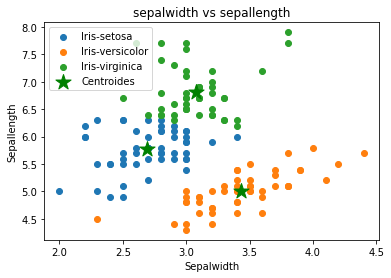

In [156]:

#Resultado de Cluster 2
d1f0 = dataset1[dataset1.Cluster1==0]
d1f1 = dataset1[dataset1.Cluster1==1]
d1f2 = dataset1[dataset1.Cluster1==2]

plt.scatter(d1f0.Sepalwidth, d1f0.Sepallength, Label='Iris-setosa')
plt.scatter(d1f1.Sepalwidth, d1f1.Sepallength, Label='Iris-versicolor')
plt.scatter(d1f2.Sepalwidth, d1f2.Sepallength, Label='Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='Green', marker='*', label='Centroides', s=256)

plt.title('sepalwidth vs sepallength')
plt.xlabel('Sepalwidth')
plt.ylabel('Sepallength')
plt.legend()
plt.show()

In [158]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset1[['Sepallength','Sepalwidth']])
    sse.append(km.inertia_)

C:\Users\Hecto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


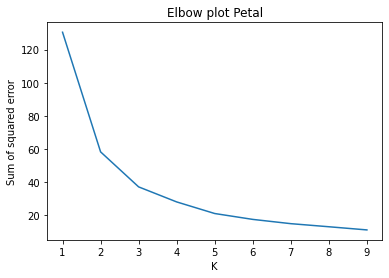

In [159]:

plt.plot(k_rng,sse)

plt.title('Elbow plot Petal')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [160]:
#PUNTO 3

dataset2


,Sepallength,Sepalwidth,Petallength,Petalwidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [161]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['Petalwidth','Petallength','Sepallength','Sepalwidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [162]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster1'] = yp

dataset2

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name,Cluster1
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,0
146,6.3,2.5,5.0,1.9,3,2
147,6.5,3.0,5.2,2.0,3,0
148,6.2,3.4,5.4,2.3,3,0


In [163]:
dataset2.Cluster1.unique()


array([1, 2, 0])

In [164]:
km.cluster_centers_


array([[2.07105263, 5.74210526, 6.85      , 3.07368421],
       [0.246     , 1.462     , 5.006     , 3.428     ],
       [1.43387097, 4.39354839, 5.9016129 , 2.7483871 ]])

In [165]:
km.inertia_


78.851441426146

In [167]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset2[['Sepallength']])
dataset2['Sepallength'] = scaler.transform(dataset2[['Sepallength']])

scaler.fit(dataset2[['Sepalwidth']])
dataset2['Sepalwidth'] = scaler.transform(dataset2[['Sepalwidth']])

scaler.fit(dataset2[['Petallength']])
dataset2['Petallength'] = scaler.transform(dataset2[['Petallength']])

scaler.fit(dataset2[['Petalwidth']])
dataset2['Petalwidth'] = scaler.transform(dataset2[['Petalwidth']])

dataset2

,Sepallength,Sepalwidth,Petallength,Petalwidth,Name,Cluster1
0,0.222222,0.625000,0.067797,0.041667,1,1
1,0.166667,0.416667,0.067797,0.041667,1,1
2,0.111111,0.500000,0.050847,0.041667,1,1
3,0.083333,0.458333,0.084746,0.041667,1,1
4,0.194444,0.666667,0.067797,0.041667,1,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,3,0
146,0.555556,0.208333,0.677966,0.750000,3,2
147,0.611111,0.416667,0.711864,0.791667,3,0
148,0.527778,0.583333,0.745763,0.916667,3,0


In [169]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset2[['Petalwidth','Petallength','Sepallength','Sepalwidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [172]:
dataset2['Cluster2'] = yp

dataset2


,Sepallength,Sepalwidth,Petallength,Petalwidth,Name,Cluster1,Cluster2
0,0.222222,0.625000,0.067797,0.041667,1,1,1
1,0.166667,0.416667,0.067797,0.041667,1,1,1
2,0.111111,0.500000,0.050847,0.041667,1,1,1
3,0.083333,0.458333,0.084746,0.041667,1,1,1
4,0.194444,0.666667,0.067797,0.041667,1,1,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,3,0,2
146,0.555556,0.208333,0.677966,0.750000,3,2,0
147,0.611111,0.416667,0.711864,0.791667,3,0,2
148,0.527778,0.583333,0.745763,0.916667,3,0,2


In [173]:
dataset2.Cluster2.unique()


array([1, 2, 0])

In [174]:
km.cluster_centers_


array([[0.54918033, 0.57571548, 0.44125683, 0.30737705],
       [0.06083333, 0.07830508, 0.19611111, 0.595     ],
       [0.82478632, 0.79704476, 0.70726496, 0.4508547 ]])

In [175]:
km.inertia_


6.982216473785234

In [179]:
# About the scalling: does it helps or not? 
#Escalar la información si sirve para tener  una mejor perspectiva de los datos y su relación entre ellos. 

#About the elbow plot: does the K agree with the real number of clusters?
#Al  momento de realizar el analisis elbow plot, la K seria el numero real de clusters necesitados ya que son 3 diferentes tipos de flores.

#Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
#La mejor opción sería hacer los K means solos, ya que como se observa en los primeros dos puntos se relacionas de manera más precisa, en comparación de juntar las cuatro de ellas, ya que se puede confundir y difícil su comparación al no poderse graficar. 